## Acknowledgements
This notebook based on the notebooks from the 2019 Kaggle ML & DS Survey:
* https://www.kaggle.com/artgor/a-look-at-russian-kagglers-over-time
* https://www.kaggle.com/vbmokin/a-look-at-ukrainian-kagglers-during-2017-2019

and on the datasets:
* 2017 dataset: https://www.kaggle.com/kaggle/kaggle-survey-2017
* 2018 dataset: https://www.kaggle.com/kaggle/kaggle-survey-2018
* 2019 dataset: https://www.kaggle.com/c/kaggle-survey-2019
* 2020 dataset: https://www.kaggle.com/c/kaggle-survey-2020

### Thanks to 

### My upgrade:
* model tuning

<a class="anchor" id="0"></a>
# 2017-2020 Kaggle ML & DS Survey

We have a Machine Learning and Data Science Survey from Kaggle (2017-2020).

Let's analyze information about Kagglers of World including Ukrainian kagglers (I'm Ukrainian myself too), including the best from them now (2020) - Grandmasters.

<a class="anchor" id="0.1"></a>
## Table of Contents

1. [Import libraries](#1)
1. [Download data](#2)
1. [Preprocessing data](#3)
1. [EDA for kagglers from around the world](#4)
1. [EDA for kagglers from Ukraine](#5)
1. [Kaggle Grandmasters from Ukraine](#6)

## 1. Import libraries<a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

Import libraries

In [ ]:
import numpy as np 
import pandas as pd 
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
from ipywidgets import interact, interactive, interact_manual
import ipywidgets as widgets
import colorlover as cl

## 2. Download data<a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

Download data from datasets:
* 2017 dataset: https://www.kaggle.com/kaggle/kaggle-survey-2017
* 2018 dataset: https://www.kaggle.com/kaggle/kaggle-survey-2018
* 2019 dataset: https://www.kaggle.com/c/kaggle-survey-2019
* 2020 dataset: https://www.kaggle.com/c/kaggle-survey-2020

In [ ]:
# loading data from different years
DIR = '/kaggle/input/kaggle-survey-2020/'
df_choice_20 = pd.read_csv(DIR + 'kaggle_survey_2020_responses.csv', low_memory=False, header=[0,1])
df_choice_20.columns = ['_'.join(col) for col in df_choice_20.columns]

DIR = '/kaggle/input/kaggle-survey-2019/'
df_free_19 = pd.read_csv(DIR + 'other_text_responses.csv', low_memory=False)
df_choice_19 = pd.read_csv(DIR + 'multiple_choice_responses.csv', low_memory=False, encoding='latin-1', header=[0,1])
df_choice_19.columns = ['_'.join(col) for col in df_choice_19.columns]

DIR = '/kaggle/input/kaggle-survey-2018/'
df_free_18 = pd.read_csv(DIR + 'freeFormResponses.csv', low_memory=False, header=[0,1])
df_choice_18 = pd.read_csv(DIR + 'multipleChoiceResponses.csv', low_memory=False, header=[0,1])
df_free_18.columns = ['_'.join(col) for col in df_free_18.columns]
df_choice_18.columns = ['_'.join(col) for col in df_choice_18.columns]

DIR = '/kaggle/input/kaggle-survey-2017/'
df_free_17 = pd.read_csv(DIR + 'freeformResponses.csv', low_memory=False)
df_choice_17 = pd.read_csv(DIR + 'multipleChoiceResponses.csv', low_memory=False, encoding='latin-1')

## 3. Preprocessing data<a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Top25 from countries
country_name = 'Q3_In which country do you currently reside?'
top_count = df_choice_20[country_name].value_counts().head(25).reset_index().rename(columns={country_name: 'count', 'index': 'Country'})
print('The Top25 countries:')
top_count

In [ ]:
def get_age(x: int):
    """
    Convert numerical age to categories.
    """
    if 18 <= x <= 21:
        return '18-21'
    elif 22 <= x <= 24:
        return '22-24'
    elif 25 <= x <= 29:
        return '25-29'
    elif 30 <= x <= 34:
        return '30-34'
    elif 35 <= x <= 39:
        return '35-39'
    elif 40 <= x <= 44:
        return '40-44'
    elif 45 <= x <= 49:
        return '45-49'
    elif 50 <= x <= 54:
        return '50-54'
    elif 55 <= x <= 59:
        return '55-59'
    elif 60 <= x <= 69:
        return '60-69'
    elif x >= 70:
        return '70+'
    
# create a new age column with the same name and unique values in all datasets
df_choice_17['Age_'] = df_choice_17['Age'].apply(lambda x: get_age(x))
df_choice_18['Age_'] = df_choice_18['Q2_What is your age (# years)?']
df_choice_18.loc[df_choice_18['Age_'].isin(['70-79', '80+']), 'Age_'] = '70+'
df_choice_19['Age_'] = df_choice_19['Q1_What is your age (# years)?']
df_choice_20['Age_'] = df_choice_20['Q1_What is your age (# years)?']

In [ ]:
# renaming columns so that it would be easier to work with them
df_choice_17 = df_choice_17.rename(columns={'GenderSelect': 'Gender', 'FormalEducation': 'Degree'})
df_choice_18 = df_choice_18.rename(columns={'Q1_What is your gender? - Selected Choice': 'Gender', 
                                            'Q9_What is your current yearly compensation (approximate $USD)?': 'Salary',
                                            'Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Degree'})
df_choice_19 = df_choice_19.rename(columns={'Q2_What is your gender? - Selected Choice': 'Gender', 
                                            'Q10_What is your current yearly compensation (approximate $USD)?': 'Salary',
                                            'Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Degree'})
df_choice_20 = df_choice_20.rename(columns={'Q2_What is your gender? - Selected Choice': 'Gender', 
                                            'Q24_What is your current yearly compensation (approximate $USD)?': 'Salary',
                                            'Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Degree'})

# Degree special symbols filtering
df_choice_20['Degree'] = df_choice_20['Degree'].replace({'Masterâs degree': 'Master’s degree', 'Bachelorâs degree': 'Bachelor’s degree',
                                                         'Some college/university study without earning a bachelorâs degree': 'Some college/university study without earning a bachelor’s degree'})
df_choice_19['Degree'] = df_choice_19['Degree'].replace({'Masterâs degree': 'Master’s degree', 'Bachelorâs degree': 'Bachelor’s degree',
                                                         'Some college/university study without earning a bachelorâs degree': 'Some college/university study without earning a bachelor’s degree'})
df_choice_17['Degree'] = df_choice_17['Degree'].replace({'Masterâs degree': 'Master’s degree', 'Bachelorâs degree': 'Bachelor’s degree',
                                                         'Some college/university study without earning a bachelorâs degree': 'Some college/university study without earning a bachelor’s degree',
                                                         "I did not complete any formal education past high school": "No formal education past high school"})

In [ ]:
# Changing salary values to the same categories
for df in ([df_choice_18, df_choice_19, df_choice_20]):
    df.loc[df['Salary'].isin(['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999']), 'Salary'] = '0-10,000'
    df.loc[df['Salary'].isin(['10,000-14,999', '15,000-19,999']), 'Salary'] = '10-20,000'
    df.loc[df['Salary'].isin(['20,000-24,999', '25,000-29,999']), 'Salary'] = '20-30,000'
    df.loc[df['Salary'] == '30,000-39,999', 'Salary'] = '30-40,000'
    df.loc[df['Salary'] == '40,000-49,999', 'Salary'] = '40-50,000'
    df.loc[df['Salary'] == '50,000-59,999', 'Salary'] = '50-60,000'
    df.loc[df['Salary'] == '60,000-69,999', 'Salary'] = '60-70,000'
    df.loc[df['Salary'] == '70,000-79,999', 'Salary'] = '70-80,000'
    df.loc[df['Salary'] == '80,000-89,999', 'Salary'] = '80-90,000'
    df.loc[df['Salary'] == '90,000-99,999', 'Salary'] = '90-100,000'
    df.loc[df['Salary'] == '100,000-124,999', 'Salary'] = '100-125,000'
    df.loc[df['Salary'] == '125,000-149,999', 'Salary'] = '125-150,000'
    df.loc[df['Salary'] == '150,000-199,999', 'Salary'] = '150-200,000'
    df.loc[df['Salary'] == '200,000-249,999', 'Salary'] = '200-250,000'
    df.loc[df['Salary'] == '250,000-299,999', 'Salary'] = '250-300,000'
    df.loc[df['Salary'].isin(['400,000-500,000', '300,000-400,000', '400-500,000', '300-400,000','300,000-500,000']), 'Salary'] = '300-500,000'
    df.loc[df['Salary'].isin(['> $500,000', '500,000+']), 'Salary'] = '> $500,000'

In [ ]:
# Adaptation 'Gender' to 2020
for df in [df_choice_17, df_choice_18, df_choice_19]:
    df['Gender'] = df['Gender'].replace({'Male': 'Man', 'Female': 'Woman'})

In [ ]:
# Functions

def plot_gender_vars(var1: str = '', title_name: str = '', title_region: str = ''):
    """
    Make separate count plots for genders over years.
    """
    colors = cl.scales['4']['qual']['Paired']
    names = {0: '2017', 1: '2018', 2: '2019', 3: '2020'}
    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Man', 'Woman'), print_grid=False)
    
    for j, c in enumerate(['Man', 'Woman']):
        data = []
        for i, df in enumerate([df_choice_17, df_choice_18, df_choice_19, df_choice_20]):
            grouped = df.loc[(df['Gender'] == c), var1].value_counts().sort_index().reset_index()
            grouped['Age_'] = grouped['Age_'] / np.sum(grouped['Age_'])
            trace = go.Bar(
                x=grouped['index'],
                y=grouped.Age_,
                name=names[i],
                marker=dict(color=colors[i]),
                showlegend=True if j == 0 else False,
                legendgroup=i
            )
            fig.append_trace(trace, 1, j + 1)    

    fig['layout'].update(height=400, width=800, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', 
                         title=f'Rate of {title_region} kagglers by {title_name} and gender');
    return fig


def plot_var(var1: str = '', title_name: str = '', title_region: str = ''):
    """
    Plot one variable over years.
    """
    colors = cl.scales['4']['qual']['Paired']
    names = {0: '2017', 1: '2018', 2: '2019', 3: '2020'}
    
    data = []
    for i, df in enumerate([df_choice_17, df_choice_18, df_choice_19, df_choice_20]):
        grouped = df[var1].value_counts().sort_index().reset_index()
        grouped[var1] = grouped[var1] / np.sum(grouped[var1])
        trace = go.Bar(
            x=grouped['index'],
            y=grouped[var1],
            name=names[i],
            marker=dict(color=colors[i]),
            legendgroup=i
        )
        data.append(trace)
    layout = dict(height=600, width=800, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', 
                  title=f'{title_region} kagglers by {title_name}');  
    fig = dict(data=data, layout=layout)
    return fig


def plot_var_salary(var1: str = '', title_name: str = '', normalize: bool = False, title_region: str = ''):
    """
    Plot salary over years. This is a separate function, because
    it is necessary to add code for sorting.
    """
    colors = cl.scales['4']['qual']['Paired']
    names = {0: '2018', 1: '2019', 2: '2020'}
    
    data = []
    for i, df in enumerate([df_choice_18, df_choice_19, df_choice_20]):
        grouped = df[var1].dropna().value_counts().sort_index().reset_index()
        if normalize:
            grouped[var1] = grouped[var1] / np.sum(grouped[var1])
        map_dict = {'0-10,000': 0,
                    '10-20,000': 1,
                    '100-125,000': 10,
                    '125-150,000' : 11,
                    '150-200,000': 12,
                    '20-30,000': 2,
                    '200-250,000': 13,
                    '250-300,000': 14,
                    '30-40,000': 3,
                    '300-500,000': 15,
                    '40-50,000': 4,
                    '50-60,000': 5,
                    '60-70,000': 6,
                    '70-80,000': 7,
                    '80-90,000': 8,
                    '90-100,000': 9,
                    '> $500,000': 16,
                    'I do not wish to disclose my approximate yearly compensation': 17}
        grouped['sorting'] = grouped['index'].apply(lambda x: map_dict[x])
        grouped = grouped.loc[grouped['index'] != 'I do not wish to disclose my approximate yearly compensation']
        grouped = grouped.sort_values('sorting', ascending=True)
        trace = go.Bar(
            x=grouped['index'],
            y=grouped[var1],
            name=names[i],
            marker=dict(color=colors[i]),
            legendgroup=i
        )
        data.append(trace)
    layout = dict(height=500, width=800, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', 
                  title=f'{title_region} kagglers by {title_name}');  
    fig = dict(data=data, layout=layout)
    return fig


def plot_choice_var(var: str = '', 
                    title_name: str = ''):
    """
    Plot a variable, in which responders could select several answers - in 2020.
    """
    col_names = [col for col in df_choice_20.columns if f'{var}_Part' in col]
    data = []
    small_df = df_choice_20[col_names]
    text_values = [col.split('- ')[2] for col in col_names]
    counts = []
    for m, n in zip(col_names, text_values):
        if small_df[m].nunique() == 0:
            counts.append(0)
        else:
            counts.append(sum(small_df[m] == n))
            
    trace = go.Bar(
        x=text_values,
        y=counts,
        name='c',
        marker=dict(color='blue'),
        showlegend=False
    )
    data.append(trace)    
    fig = go.Figure(data=data)
    fig['layout'].update(height=600, width=800, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', title=f'Popular {title_name}');
    return fig


def plot_choice_var19(var: str = '', 
                    title_name: str = ''):
    """
    Plot a variable, in which responders could select several answers - in 2019.
    """
    col_names = [col for col in df_choice_19.columns if f'{var}_Part' in col]
    data = []
    small_df = df_choice_19[col_names]
    text_values = [col.split('- ')[2] for col in col_names]
    counts = []
    for m, n in zip(col_names, text_values):
        if small_df[m].nunique() == 0:
            counts.append(0)
        else:
            counts.append(sum(small_df[m] == n))
            
    trace = go.Bar(
        x=text_values,
        y=counts,
        name='c',
        marker=dict(color='blue'),
        showlegend=False
    )
    data.append(trace)    
    fig = go.Figure(data=data)
    fig['layout'].update(height=600, width=800, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', title=f'Popular {title_name}');
    return fig

## 4. EDA for kagglers from around the world<a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

## General information

More 20k kagglers took part in the survey this year. Why is this number only slightly larger than last year and much smaller than in 2018? I think this year the survey information was less widespread, I don't know why.

In [ ]:
df_count = pd.DataFrame({'Year': [2017, 2018, 2019, 2020], 'Count': [df_choice_17.shape[0], df_choice_18.shape[0], df_choice_19.shape[0], df_choice_20.shape[0]]})
top_count = top_count.sort_values('count')

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(y=top_count['Country'], x=top_count['count'], orientation='h', name='Number of respondents by country in 2020'), row=1, col=1)
fig.add_trace(go.Bar(x=df_count['Year'], y=df_count['Count'], name='Number of responders by year'), row=1, col=2)

fig['layout'].update(height=600, width=800,paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)');
iplot(fig);

Not surprisingly, the average age is increasing over time. One of the reasons is that people grow older over time (obviously :)). Another reason - more elder experts are switching career from other spheres to DS.

At the same time, the share of very young people who start to part in Kaggle from school or while studying for a bachelor's degree is growing...or they are more likely to participate in such surveys. :)

It is interesting to note that men are interested in DS up to 70+ and women - up to 69+ (in 2020 - 70+ is extremely few). The largest group of specialists among men is up to 39, among women up to 34.

In [ ]:
fig = plot_gender_vars(var1='Age_', title_name='age', title_region = 'World')
iplot(fig);

Surprisingly, in 2020 there were fewer people with degrees, but more bachelors. 
This correlates with the age chart above. Therefore, we can draw the same conclusion: the share of very young people who start to part in Kaggle from school or while studying for a bachelor's degree is growing...or they are more likely to participate in such surveys. :)

In [ ]:
fig = plot_var(var1='Degree', title_name='degree', title_region = "World")
iplot(fig);

**As can be seen, the salary decreased in 2020, unfortunately**

Sill, we notice 50 rich persons with > 500k$

In [ ]:
fig = plot_var_salary(var1='Salary', title_name='salary', title_region = "World")
iplot(fig);

## Professional skills

It isn't surprising that Kaggle and YouTube is one of the main sources of getting information :)

**Interestingly, the role of blogs has declined in comparison with 2019.**

In [ ]:
fig = plot_choice_var(var='Q39', title_name='resources in 2020')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q12', title_name='resources in 2019')
iplot(fig);

There are several interesting things about popular programming languages in world:
- Python and SQL are, of course, top used languages;
- the role of R has significantly decreased compared to 2019, which is quite expected, but still remains in second place after Python;
- a lot of kagglers have background in software programming, as a result a lot of people know C++, Javascript and other languages.

In [ ]:
fig = plot_choice_var(var='Q7', title_name='languages in 2020')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q18', title_name='languages in 2019')
iplot(fig);

I think it is quite amazing that a lot of people do some kind or research or try innovative things. A lot of people do research or try to apply new methods.

**Interestingly, the activity of "Build prototypes to explore applying machine learning to new areas" has increased in comparison with 2019.**

In [ ]:
fig = plot_choice_var(var='Q23', title_name='additional activities in 2020')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q9', title_name='additional activities in 2019')
iplot(fig);

Not surprisingly word embeddings continue to be popular. 
As expected, role BERT/GPT increased in comparison with 2019.

In [ ]:
fig = plot_choice_var(var='Q19', title_name='NLP tools in 2020')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q27', title_name='NLP tools in 2019')
iplot(fig);

While scikit-learn is a top popular library for obvious reasons, there are other interesting libraries.
- LGB and XGB are very popular as they provide great results and are easy to use, but the role of the LGB has decreased
- Keras and Tensorflow are still ahead of Pytorch by the number of users
- Prophet, Caret (PyCaret) and other new technologies are increasingly used.

In [ ]:
fig = plot_choice_var(var='Q16', title_name='libraries in 2020')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q28', title_name='libraries in 2019')
iplot(fig);

## 5. EDA for kagglers from Ukraine<a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Taking only Ukrainian responders
df_choice_17 = df_choice_17.loc[df_choice_17['Country'] == 'Ukraine']
df_choice_18 = df_choice_18.loc[df_choice_18['Q3_In which country do you currently reside?'] == 'Ukraine']
df_choice_19 = df_choice_19.loc[df_choice_19['Q3_In which country do you currently reside?'] == 'Ukraine']
df_choice_20 = df_choice_20.loc[df_choice_20['Q3_In which country do you currently reside?'] == 'Ukraine']

## General information

The Ukrainian community on Kaggle is not very strong yet. We started taking part in Kaggle competitions a long time ago, and in many competitions there are at least a several teams in the medal zone, currently there many Ukrainian Masters and Experts, but only 170 people took part in this year's survey (23th place among countries, excluding "others").

About 200 Ukrainians took part in the survey this year. Why is this number lower than last year and than in 2018? I think this year the survey information was less widespread, I don't know why.

In [ ]:
df_count = pd.DataFrame({'Year': [2017, 2018, 2019, 2020], 'Count': [df_choice_17.shape[0], df_choice_18.shape[0], df_choice_19.shape[0], df_choice_20.shape[0]]})
top_count = top_count.sort_values('count')

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(y=top_count['Country'], x=top_count['count'], orientation='h', name='Number of respondents by country in 2020'), row=1, col=1)
fig.add_trace(go.Bar(x=df_count['Year'], y=df_count['Count'], name='Number of Ukrainian responders by year'), row=1, col=2)

fig['layout'].update(height=600, width=800,paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)');
iplot(fig);

Not surprisingly, the average age is increasing over time. One of the reasons is that people grow older over time (obviously :)). Another reason - more elder experts are switching career from other spheres to DS.

It is interesting to note that men are interested in DS up to 69 and women - up to 70+ (in 2020 - both to 69). The largest group of specialists among men is up to 39, among women up to 34.

In [ ]:
fig = plot_gender_vars(var1='Age_', title_name='age', title_region = "Ukrainian")
iplot(fig);

As all over the world, in 2020 there were fewer people with degrees, but more bachelors. 
This correlates with the age chart above. Therefore, we can draw the same conclusion: the share of very young people who start to part in Kaggle from school or while studying for a bachelor's degree is growing...or they are more likely to participate in such surveys. :)

In [ ]:
fig = plot_var(var1='Degree', title_name='degree', title_region = "Ukrainian")
iplot(fig);

If we talk about salaries, it is important to understand several things:
- some Ukrainians work in foreign countries and other countries and as result have quite high salaries;
- those working in Kyiv and some other big cities have good salaries;
- and people working in other cities usually have a much lower salary.

**As can be seen, as all over the world, the salary decreased in 2020, unfortunately**

100k is possible, but difficult to achieve - this is usually a level of head of DS.
50k is the level of a senior DS.
~30k is the level of a middle DS.

By the way, did you notice a rich person with 500k$+? I wonder who that person is :)

In [ ]:
fig = plot_var_salary(var1='Salary', title_name='salary', title_region = "Ukrainian")
iplot(fig);

## Professional skills

It isn't surprising that Kaggle and YouTube is one of the main sources of getting information :)
But is is worth noticing that slack communities aren't far behind.

**Interestingly, as all over the world, the role of blogs has declined in comparison with 2019.**

In [ ]:
fig = plot_choice_var(var='Q39', title_name='resources in 2020 in Ukraine')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q12', title_name='resources in 2019 in Ukraine')
iplot(fig);

There are several interesting things about popular programming languages in Ukraine:
- Python and SQL are, of course, top used languages;
- the role of R has significantly decreased compared to 2019, which is quite expected;
- a lot of kagglers have background in software programming, as a result a lot of people know C++, Javascript and other languages.

But it is interesting that all over the world this language remains in second place, although its share is declining, but in Ukraine more follow the trends and move faster to Python. As far as I know, in schools and universities, everyone is already switching to Python and not to teach R.

In [ ]:
fig = plot_choice_var(var='Q7', title_name='languages in 2020 in Ukraine')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q18', title_name='languages in 2019 in Ukraine')
iplot(fig);

I think it is quite amazing that a lot of people do some kind or research or try innovative things. A lot of people do research or try to apply new methods.

**Interestingly, the activity of "Experimentation and iteration to improve existing ML models" has increased in comparison with 2019.**

Unfortunately, over the world the role of more knowledge-intensive activities has grown: "Build prototypes to explore applying machine learning to new areas".

In [ ]:
fig = plot_choice_var(var='Q23', title_name='additional activities in 2020 in Ukraine')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q9', title_name='additional activities in 2019 in Ukraine')
iplot(fig);

Not surprisingly word embeddings continue to be popular. 
As expected, role BERT/GPT increased, and role ELMo, CoVe decreased in comparison with 2019.

In [ ]:
fig = plot_choice_var(var='Q19', title_name='NLP tools in 2020 in Ukraine')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q27', title_name='NLP tools in 2019 in Ukraine')
iplot(fig);

While scikit-learn is a top popular library for obvious reasons, there are other interesting libraries.
- LGB and XGB are very popular as they provide great results and are easy to use, but the role of the LGB has decreased by almost one and a half times
- Keras and Tensorflow are still ahead of Pytorch by the number of users
- Prophet and other new technologies are increasingly used.

In [ ]:
fig = plot_choice_var(var='Q16', title_name='libraries in 2020 in Ukraine')
iplot(fig);

In [ ]:
fig = plot_choice_var19(var='Q28', title_name='libraries in 2019 in Ukraine')
iplot(fig);

## 6. Kaggle Grandmasters in Ukraine<a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

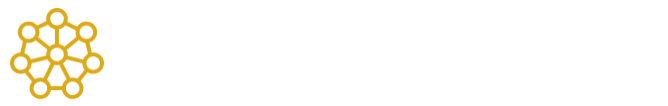

* @ddanevskyi
* @isaienkov
* @vbmokin
* @vecxoz

**Who knows others? Please write in the comments**

Your comments and feedback are most welcome.

[Go to Top](#0)